In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
max_features = 10000
max_len = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
def create_model(model_type):
    model = Sequential()
    model.add(Embedding(max_features, 32, input_length=max_len))
    if model_type == 'LSTM':
        model.add(LSTM(32))
    elif model_type == 'GRU':
        model.add(GRU(32))
    elif model_type == 'RNN':
        model.add(SimpleRNN(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/10
157/157 [==============================] - 59s 351ms/step - loss: 0.5379 - accuracy: 0.7279 - val_loss: 0.3617 - val_accuracy: 0.8512
Epoch 2/10
157/157 [==============================] - 56s 358ms/step - loss: 0.2840 - accuracy: 0.8876 - val_loss: 0.3735 - val_accuracy: 0.8482
Epoch 3/10
157/157 [==============================] - 57s 360ms/step - loss: 0.2005 - accuracy: 0.9269 - val_loss: 0.3316 - val_accuracy: 0.8716
Epoch 4/10
157/157 [==============================] - 55s 348ms/step - loss: 0.1679 - accuracy: 0.9403 - val_loss: 0.3224 - val_accuracy: 0.8758
Epoch 5/10
157/157 [==============================] - 56s 359ms/step - loss: 0.1231 - accuracy: 0.9579 - val_loss: 0.3353 - val_accuracy: 0.8640
Epoch 6/10
157/157 [==============================] - 56s 356ms/step - loss: 0.0972 - accuracy: 0.9690 - val_loss: 0.3785 - val_accuracy: 0.8726
Epoch 7/10
157/157 [==============================] - 56s 359ms/step - loss: 0.0743 - accuracy: 0.9772 - val_loss: 0.4464 - val_ac

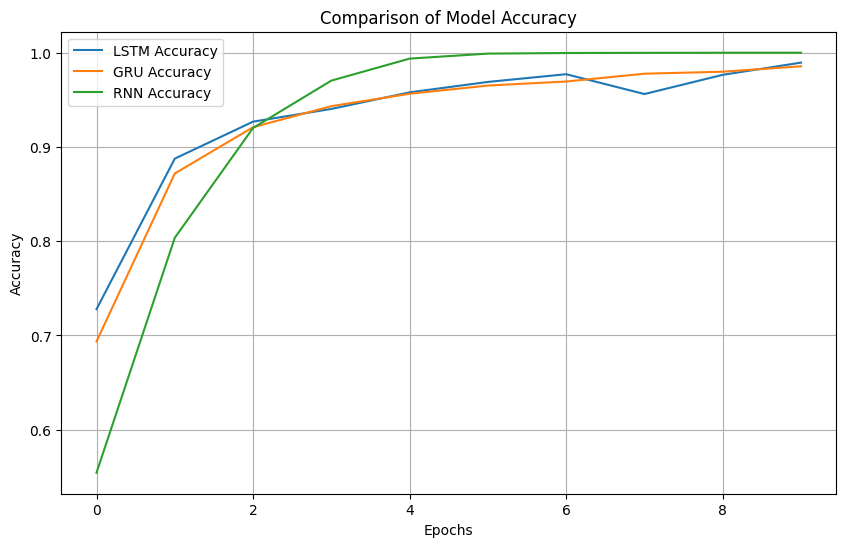

In [5]:
model_types = ['LSTM', 'GRU', 'RNN']
histories = []

plt.figure(figsize=(10, 6))

for model_type in model_types:
    model = create_model(model_type)
    history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)
    plt.plot(history.history['accuracy'], label=f'{model_type} Accuracy')

plt.title('Comparison of Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.savefig("plot.png")
plt.show()